[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.2.1 Szenarien Überblick

Im folgenden werden die im Forschungsprojekt FLUCCO+ verwendeten Szenarien für ein erneuerbares Österreich 2040 bzw. 2050 dargestellt. 

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *

from FLUCCOplus import scenarios

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [4]:
sc_raw = scenarios.read("szenarien_w2s.xlsx")

C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [5]:
sc_raw

,Jahr,Strombedarf,Mismatch,Importe,Stromproduktion,Wasserkraft,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,Volatile EE,Nicht-Volatile,RES0,RES1,RES2
Szenario [PJ/a],,,,,,,,,,,,,,,
EM2018,2018,228.573038,7.875056,36.884345,183.813637,122.806158,14.764716,108.041443,23.025917,5.114272,136.181632,47.632005,92.391406,77.626690,29.994685
EM2019,2019,214.258118,7.776467,11.399125,195.082526,124.993356,12.710222,112.283134,28.383002,4.770205,145.436341,49.646185,68.821777,56.111555,6.465370
E-Control 2019,2019,275.719558,0.000000,11.262889,264.455788,159.073073,51.380602,107.692470,26.711979,3.283197,137.687646,75.387540,0.000000,0.000000,0.000000
Energie und Klimazukunft 2030 (Veigl17),2030,281.857451,-13.678906,0.000000,295.536357,155.000000,49.600000,105.400000,43.000000,46.000000,194.400000,101.136357,87.457451,37.857451,-63.278906
Erneuerbare Energie 2030 (UBA16),2030,263.500000,0.000000,-50.900000,314.400000,153.800000,49.216000,104.584000,62.700000,53.400000,220.684000,93.716000,42.816000,-6.400000,-100.116000
WEM 2030 (UBA17),2030,273.404000,0.000000,10.000000,263.404000,156.958000,50.226560,106.731440,25.813000,32.724000,165.268440,98.135560,108.135560,57.909000,-40.226560
Transition 2030 (UBA17),2030,283.010000,0.000000,-16.000000,299.010000,151.680000,48.537600,103.142400,55.642000,38.664000,197.448400,101.561600,85.561600,37.024000,-64.537600
Energie und Klimazukunft 2050 (Veigl17),2050,301.655868,-99.712023,0.000000,401.367891,155.000000,49.600000,105.400000,72.000000,118.000000,295.400000,105.967891,6.255868,-43.344132,-149.312023
Erneuerbare Energie 2050 (UBA16),2050,283.400000,0.000000,-71.000000,354.400000,163.000000,52.160000,110.840000,75.900000,84.800000,271.540000,82.860000,11.860000,-40.300000,-123.160000


In [6]:
sc = (sc_raw
        .pipe(scenarios.start_pipeline)
        .pipe(scenarios.NaNtoZero)
        .pipe(scenarios.format_df)
        .pipe(scenarios.convert_PJ_to_GWH)
 )

### Strom Erzeugung nach Energieträgern


In [21]:
all = ['Jahr', 'Strombedarf', 'Mismatch', 'Importe', 'Stromproduktion',
       'Wasserkraft', 'Windkraft', 'Photovoltaik', 'Volatile EE',
       'Nicht-Volatile', 'Laufkraft', 'Pumpspeicher', 'RES0', 'RES1', 'RES2']

pp_carriers = ['Laufkraft','Windkraft', 'Photovoltaik','Nicht-Volatile']

In [22]:
sci = sc#.rename(index={name: i+1 for i, name in enumerate(sc.index)})
sci

,Jahr,Strombedarf,Mismatch,Importe,Stromproduktion,Wasserkraft,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,Volatile EE,Nicht-Volatile,RES0,RES1,RES2
Szenario,,,,,,,,,,,,,,,
EM2018,2018,63492.515635,2187.515731,10245.652209,51059.347696,34112.824396,4101.310328,30011.514345,6396.088567,1420.631225,37828.234137,13231.113558,25664.281498,21562.971169,8331.857611
EM2019,2019,59516.148650,2160.129895,3166.423864,54189.594891,34720.379444,3530.617505,31189.761940,7884.167853,1325.057050,40398.986843,13790.608048,19117.161807,15586.544302,1795.936255
E-Control 2019,2019,76588.772116,0.000000,3128.580654,73459.947109,44186.968185,14272.390724,29914.577462,7419.994658,911.999343,38246.571462,20940.984922,0.000000,0.000000,0.000000
Energie und Klimazukunft 2030 (Veigl17),2030,78293.742765,-3799.696328,0.000000,82093.439093,43055.559000,13777.778880,29277.780120,11944.445400,12777.778800,54000.004320,28093.434773,24293.738445,10515.959565,-17577.475208
Erneuerbare Energie 2030 (UBA16),2030,73194.450300,0.000000,-14138.890020,87333.340320,42722.225640,13671.112205,29051.113435,17416.668060,14833.334520,61301.116015,26032.224305,11893.334285,-1777.777920,-27810.002225
WEM 2030 (UBA17),2030,75945.561631,0.000000,2777.778000,73167.783631,43599.447932,13951.823338,29647.624594,7170.278351,9090.000727,45907.903673,27259.879959,30037.657959,16085.834620,-11174.045338
Transition 2030 (UBA17),2030,78613.895178,0.000000,-4444.444800,83058.339978,42133.336704,13482.667745,28650.668959,15456.112348,10740.000859,54846.782166,28211.557812,23767.113012,10284.445267,-17927.112545
Energie und Klimazukunft 2050 (Veigl17),2050,83793.303240,-27697.786393,0.000000,111491.089633,43055.559000,13777.778880,29277.780120,20000.001600,32777.780400,82055.562120,29435.527513,1737.741120,-12040.037760,-41475.565273
Erneuerbare Energie 2050 (UBA16),2050,78722.228520,0.000000,-19722.223800,98444.452320,45277.781400,14488.890048,30788.891352,21083.335020,23555.557440,75427.783812,23016.668508,3294.444708,-11194.445340,-34211.113848


[Text(0, 0.5, 'Strom-Erzeugung in Österreich (Szenarien)')]

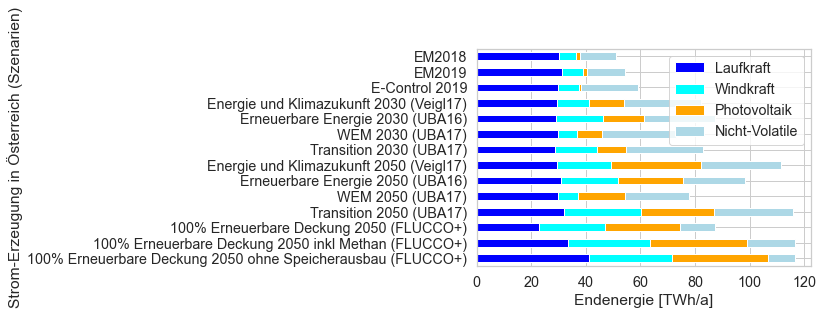

In [23]:
fig, ax = plt.subplots(1,1)

(sci[pp_carriers]/1000).reindex(index=sci[pp_carriers].index[::-1]).plot(kind="barh", stacked=True, color=config.COLORS.values(), rot=0, ax=ax)
ax.set(xlabel="Endenergie [TWh/a]")
ax.set(ylabel="Strom-Erzeugung in Österreich (Szenarien)")

In [10]:
fig.savefig("../data/processed/figures/Szenarien_EndenergienNamed", dpi=config.DPI, bbox_inches = 'tight')

In [11]:
for name, i in enumerate(sc.index):
    print(str(name+1)+": "+i, end=", ")



1: EM2018, 2: EM2019, 3: E-Control 2019, 4: Energie und Klimazukunft 2030 (Veigl17), 5: Erneuerbare Energie 2030 (UBA16), 6: WEM 2030 (UBA17), 7: Transition 2030 (UBA17), 8: Energie und Klimazukunft 2050 (Veigl17), 9: Erneuerbare Energie 2050 (UBA16), 10: WEM 2050 (UBA17), 11: Transition 2050 (UBA17), 12: 100% Erneuerbare Deckung 2050 (FLUCCO+), 13: 100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+), 14: 100% Erneuerbare Deckung 2050 ohne Speicherausbau (FLUCCO+), 

### Anteil Erneuerbarer Stromerzeugung am Endenergiemix

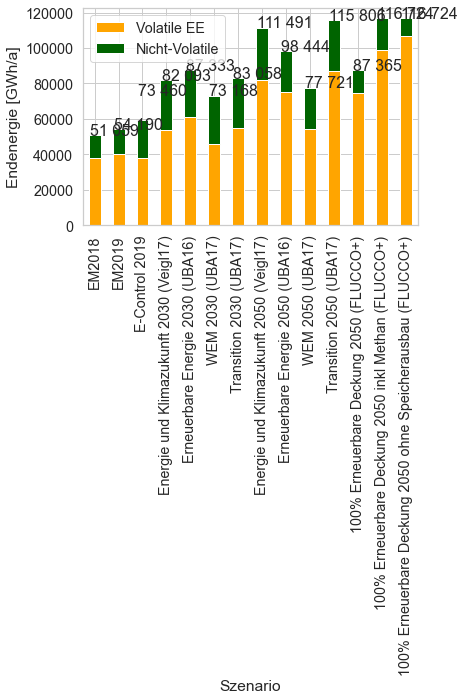

In [12]:
fig, ax = plt.subplots(1,1)
sc[["Volatile EE", "Nicht-Volatile"]].plot(ax=ax,kind="bar", stacked=True, color=["orange", "darkgreen"])
ax.set(ylabel="Endenergie [GWh/a]")
for i, label in enumerate(list(sc.index)):
    score = sc.loc[label, "Stromproduktion"]
    ax.annotate(f"{f'{score:,.0f}'.replace(',',' ')}", (i - 0.2, score))

 Ermittlung der Jahres-Skalierungsfaktoren

Prinzipiell können natürlich alle Szenarien als Skalierungsgröße verwendet werden. Unser Szenario-Letztstand,
der auf der [EnInnov 2020 Graz](https://www.tugraz.at/events/eninnov2020/nachlese/download-beitraege/stream-a/)
 vorgestellt wurde, ist die Variante "Streicher 2b". Das entspricht dem ursprünglichen Szenario [Streicher, et al. 2011] mit folgenden
 Adaptionen:
 * Reallokation der Energie aus Geothermie zu jeweils 50/50 auf Windkraft/PV, Methanisierung nur auf Windkraft (Streicher 2a)
 * Endenergiebedarf der Mobilität aus UBA17  herangezogen, Landwirtschaft ergänzt


In [13]:
sc.index[-2]

'100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)'

In [14]:
s = scenarios
s.factors("EM2019",-2, sc)


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Erzeugung'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"